## Loading Trained Model

In [1]:
from keras.models import load_model

In [5]:
# Loading the saved Model
model = load_model('model1.h5')

## Making Predictions

In [14]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [84]:
class_indices = {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}

def predict_emotion(test_img):
  # Changing image from RGB to grayscale
  test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

  # Reszing the image to 48*48 dimensions
  test_img = cv2.resize(test_img , (48,48))
  test_img = np.reshape(test_img, (1,48,48,1))

  # Normalising Image
  test_img = test_img / 255.0

  prediction = model.predict(test_img)
  prediction_index = np.argmax(prediction)

  emotion = [k for k, v in class_indices.items() if v == prediction_index]
  return emotion[0]

### On Random Image

Actual Expression: Happy
Predicted Expression:  happy


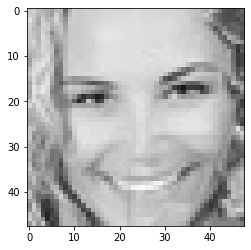

In [85]:
# Loading Image
sample_img = cv2.imread('/content/happy_face.jpg')
plt.imshow(sample_img)

print("Actual Expression: Happy")
print("Predicted Expression: ", predict_emotion(sample_img))

Actual Expression: Sad
Predicted Expression:  sad


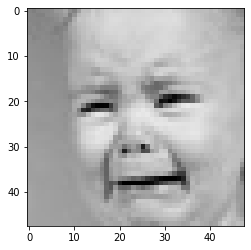

In [86]:
sample_img1 = cv2.imread('/content/sad_face.jpg')
plt.imshow(sample_img1)

print("Actual Expression: Sad")
print("Predicted Expression: ", predict_emotion(sample_img1))

### Real-time Images

Camera Capture...

In [87]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


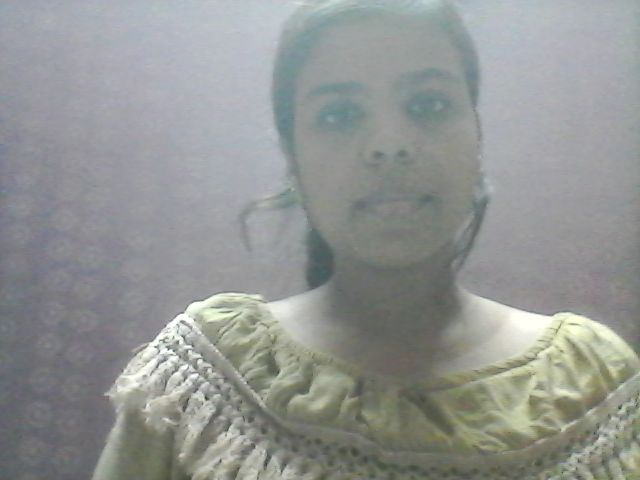

Predicted Expression:  neutral


In [90]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))

  capture_img = cv2.imread('/content/photo.jpg')
  print("Predicted Expression: ", predict_emotion(capture_img))
  
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))